# Protein Kinetics

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#%export ETS_TOOLKIT=qt4
import numpy as np
import pandas as pd

## Experiment Conditions

9_25_15 Fiber1:

Ligand: 200ul centrifuged Poly antiAmylin in 100ul pbs.

Analyte: 200ul 10uM Amylin in 100ul t20/pbs. Final Concentration 6.6uM.

## Define the data import function

In [3]:
from pandas import DataFrame, read_csv, concat
import os
import os.path as op

def get_files_in_dir(directory, sort=True):
    ''' Given a directory, returns just the files; ignores directories '''

    # If path entered with or without trailing '/', account for it
    directory = directory.rstrip('/')    
    files = [op.join(directory, item) for item in os.listdir(directory) if 
             op.isfile(op.join(directory, item))]

    if sort:
        files.sort()
    return files

def get_shortname(filepath, cut_extension=False):
    ''' simply get the filename of fullpath.  Cut extension will remove file extension'''
    shortname=os.path.basename(filepath) 
    if cut_extension:
        shortname=os.path.splitext(shortname)[0]  #Cut file extension
    return shortname

def df_from_directory(directory, csvargs, sortnames=False, concat_axis=1, shortname=True, cut_extension=False):

    filelist=get_files_in_dir(directory)

    if shortname:
        fget=lambda x:get_shortname(x, cut_extension=cut_extension)
    else:
        fget=lambda x: x
    
    ### Either full names or short names of filelist    
    working_names=[fget(afile) for afile in filelist]       

    ### This parameter can't be passed in, so if user does so, pull it out.
    try:
        csvargs.pop('names')
    except KeyError:
        pass
    else:
        raise Warning('Please do not enter a names keyword for csvargs, it gets inferred from the filenames in\
        the directory.')

    dflist=[read_csv(afile, names=[fget(afile)], **csvargs) for afile in filelist]
    
    ### THIS IS BUSTED, PUTTING NANS EVERYWHERE EXCEPT ONE FILE, but dflist itself ws nice.
    dataframe=concat(dflist, axis=1)
                        
    ### concat tries to sort these, so this will preserve the sort order
    if sortnames:
        dataframe=dataframe.reindex(columns=sorted(working_names))

    return dataframe

## Import Experiment Results

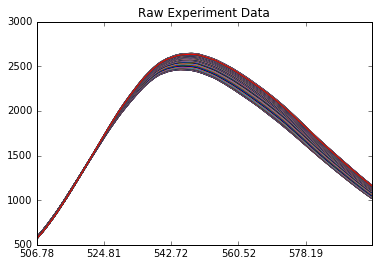

In [29]:
directory = './9_25_15/Fiber1/analyte'
directory = directory.rstrip('/')    
filelist = [op.join(directory, item) for item in os.listdir(directory) if 
             op.isfile(op.join(directory, item))][0:]
df = pd.concat([pd.read_csv(item, names=[item[-8:-4]],sep='\t',header=16) for item in filelist], axis=1).ix[450:700,0:200]#.ix[161:1050]
spec1 = (df.T-df.T.iloc[0]).T.ix[:,1:]
spec1.plot(title='Raw Experiment Data',legend=False)

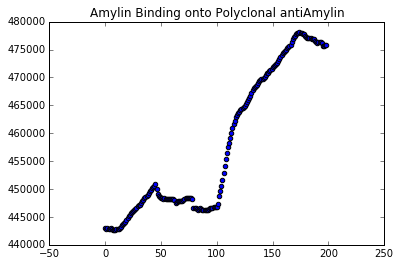

In [44]:
from scipy.integrate import simps
area = simps(spec1.T)
time = spec1.T.index.astype(float)
plt.scatter(time,area)
plt.title("Amylin Binding onto Polyclonal antiAmylin")
#plot(area)

In [31]:
t = time[100:120]
I0 = area[99]
Ieq = area.max()
It = area[100:120]
print I0
print Ieq
print It

446740.928333
478050.631667
[ 446826.84083333  447265.57166667  448666.01083333  449660.93
  450513.20833333  451579.525       452938.44583333  454206.88
  455403.40833333  456528.15083333  457440.42916667  458254.8775
  459158.35916667  460031.67        460892.27416667  461578.875
  462271.1525      462954.9875      463301.3475      463532.57833333]


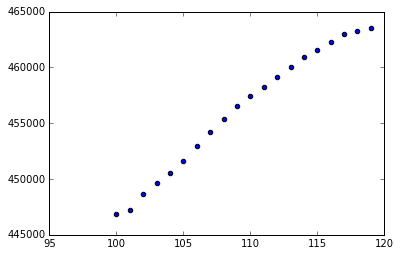

In [32]:
matplotlib.pyplot.scatter(t,It)

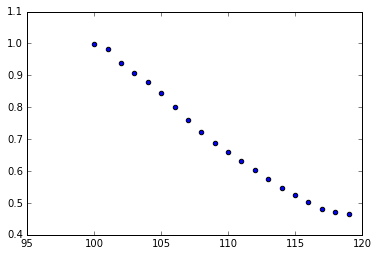

In [33]:
matplotlib.pyplot.scatter(t,(It-Ieq)/(I0-Ieq))

Slope= -0.030203


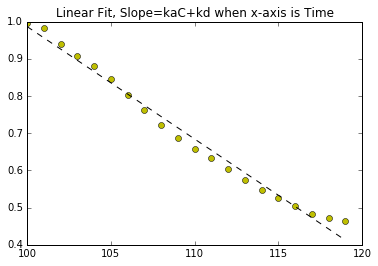

In [43]:
x = t
y = (It-Ieq)/(I0-Ieq)

import numpy as np
import matplotlib.pyplot as plt

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.title("Linear Fit, Slope=kaC+kd when x-axis is Time")
#plt.xlim(9, 20)
#plt.ylim(0.2, 1)

print "Slope= %lf" %fit[0]

kaC+kd = -0.030203/Scan Interval

C=6.6uM

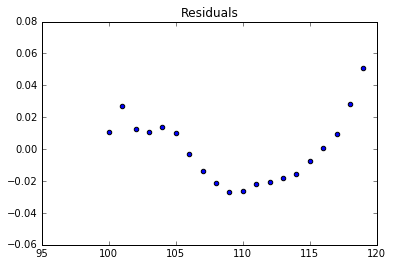

In [40]:
Residuals = y-fit[0]*x-fit[1]
plt.scatter(t,Residuals)
plt.title("Residual")

In [41]:
#ref1=(spec1.T/spec1.T.iloc[0]).T
#ref2=(spec2.T/spec2.T.iloc[0]).T

#ref1_real = pd.DataFrame(ref1.values.real).astype('float')
#abs1= -np.log10(ref1_real)
#ref2_real = pd.DataFrame(ref2.values.real).astype('float')
#abs2= -np.log10(ref2_real)

#fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))

#ref1.plot(ax=ax1,title='Reflection',legend=False,ylim=(1,1.04))
#abs1.plot(ax=ax2,title='Absorbance',legend=False)